#**Comparative Analysis of Logistic Regression, Support Vector Machines and DistilBERT for Sentiment Analysis Using TF-IDF Features**

# 1 Data Cleaning


In [1]:
import pandas as pd
import re
from bs4 import BeautifulSoup, MarkupResemblesLocatorWarning
import warnings
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# remove HTML tags
def strip_html(text):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", MarkupResemblesLocatorWarning)
        soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

# remove the content inside square brackets
def remove_between_square_brackets(text):
    return re.sub(r'\[[^]]*\]', '', text)

# remove URLs
def remove_urls(text):
    return re.sub(r'http\S+', '', text)

# remove stopwords from text
def remove_stopwords(text, stop_words):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words and word.isalpha()]
    return " ".join(filtered_words)

# denoising the text
def denoise_text(text, stop_words):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_urls(text)
    text = remove_stopwords(text, stop_words)
    return text

# load data and apply the cleaning functions
if __name__ == "__main__":
    file_path = r'/content/drive/MyDrive/INFO555/Project1/IMDB_Dataset.csv'

    df = pd.read_csv(file_path)

    stop_words = set(["the", "a", "and", "is", "in", "it", "of", "to", "this", "that", "for", "on"])

    # enoising function on the review column
    df['cleaned_review'] = df['review'].apply(lambda x: denoise_text(x, stop_words))

    # save the final file
    cleaned_file_path = r'/content/drive/MyDrive/INFO555/Project1/cleaned_reviews.csv'
    df.to_csv(cleaned_file_path, index=False)

    print(f"Data cleaning complete. Cleaned file saved at: {cleaned_file_path}")


Data cleaning complete. Cleaned file saved at: /content/drive/MyDrive/INFO555/Project1/cleaned_reviews.csv


# 2 EDA

## 2.1 Count of Sentiment Lables and Word Clouds

                                                   review sentiment  \
count                                               50000     50000   
unique                                              49582         2   
top     Loved today's show!!! It was a variety and not...  positive   
freq                                                    5     25000   

                                           cleaned_review  
count                                               50000  
unique                                              49578  
top     Loved was variety not solely cooking would hav...  
freq                                                    5  
['positive' 'negative']


<ipython-input-3-cf2c1a6316de>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


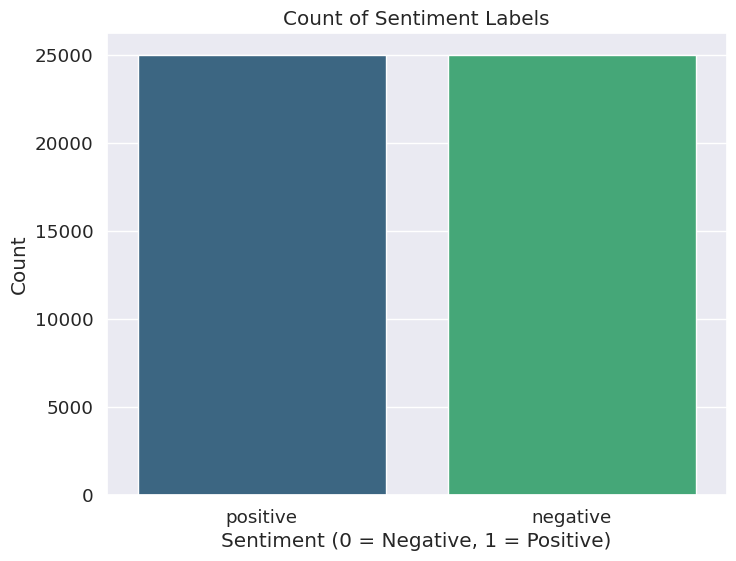

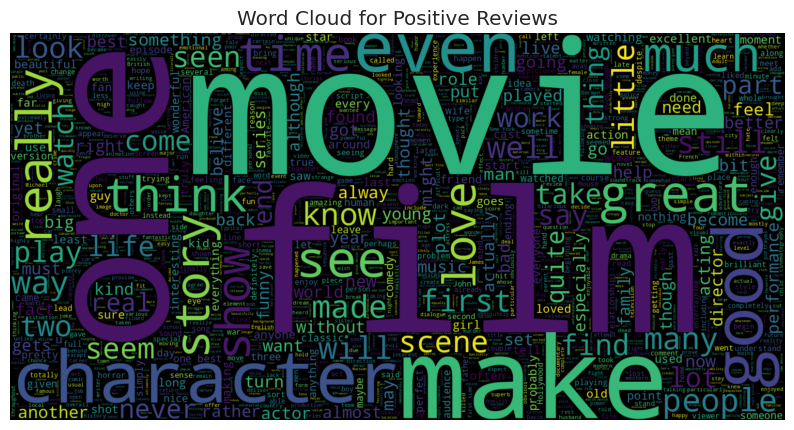

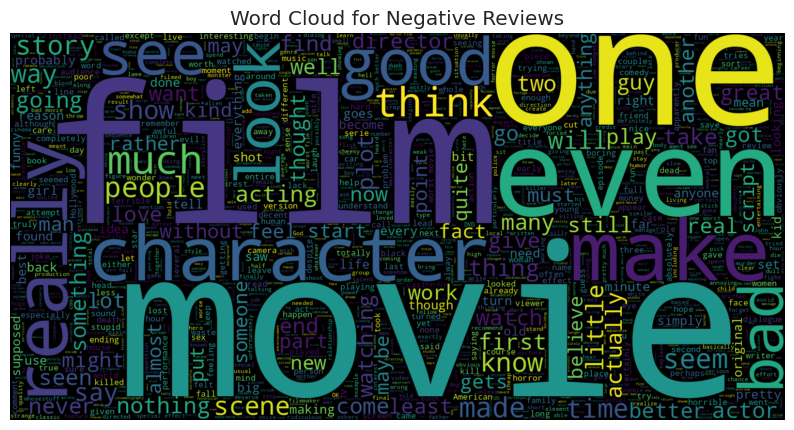

                                              review sentiment  \
0  One of the other reviewers has mentioned that ...  positive   
1  A wonderful little production. <br /><br />The...  positive   
2  I thought this was a wonderful way to spend ti...  positive   
3  Basically there's a family where a little boy ...  negative   
4  Petter Mattei's "Love in the Time of Money" is...  positive   

                                      cleaned_review  
0  One other reviewers has mentioned after watchi...  
1  wonderful little filming technique very very f...  
2  I thought was wonderful way spend time too hot...  
3  Basically family where little boy thinks zombi...  
4  Petter Time visually stunning film Mattei offe...  


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

file_path = r'/content/drive/MyDrive/INFO555/Project1/cleaned_reviews.csv'  # Update the file extension if needed
df = pd.read_csv(file_path)


print(df.describe())

# unique values in the sentiment column
print(df['sentiment'].unique())

sns.set(style="darkgrid", font_scale=1.2)

plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df, palette='viridis')
plt.title('Count of Sentiment Labels')
plt.xlabel('Sentiment (0 = Negative, 1 = Positive)')
plt.ylabel('Count')
plt.show()

# word cloud for positive reviews
positive_reviews = df[df.sentiment == 'positive']  # Filter for positive reviews
if positive_reviews.empty:
    print("No positive reviews found.")
else:
    plt.figure(figsize=(10, 10))
    wc = WordCloud(max_words=2000, width=1600, height=800).generate(" ".join(positive_reviews.cleaned_review))  # Use cleaned_review column
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud for Positive Reviews')
    plt.show()

# word cloud for negative reviews
negative_reviews = df[df.sentiment == 'negative']
if negative_reviews.empty:
    print("No negative reviews found.")
else:
    plt.figure(figsize=(10, 10))
    wc_neg = WordCloud(max_words=2000, width=1600, height=800).generate(" ".join(negative_reviews.cleaned_review))  # Use cleaned_review column
    plt.imshow(wc_neg, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud for Negative Reviews')
    plt.show()
print(df.head())

## 2.2 Number of characters in texts

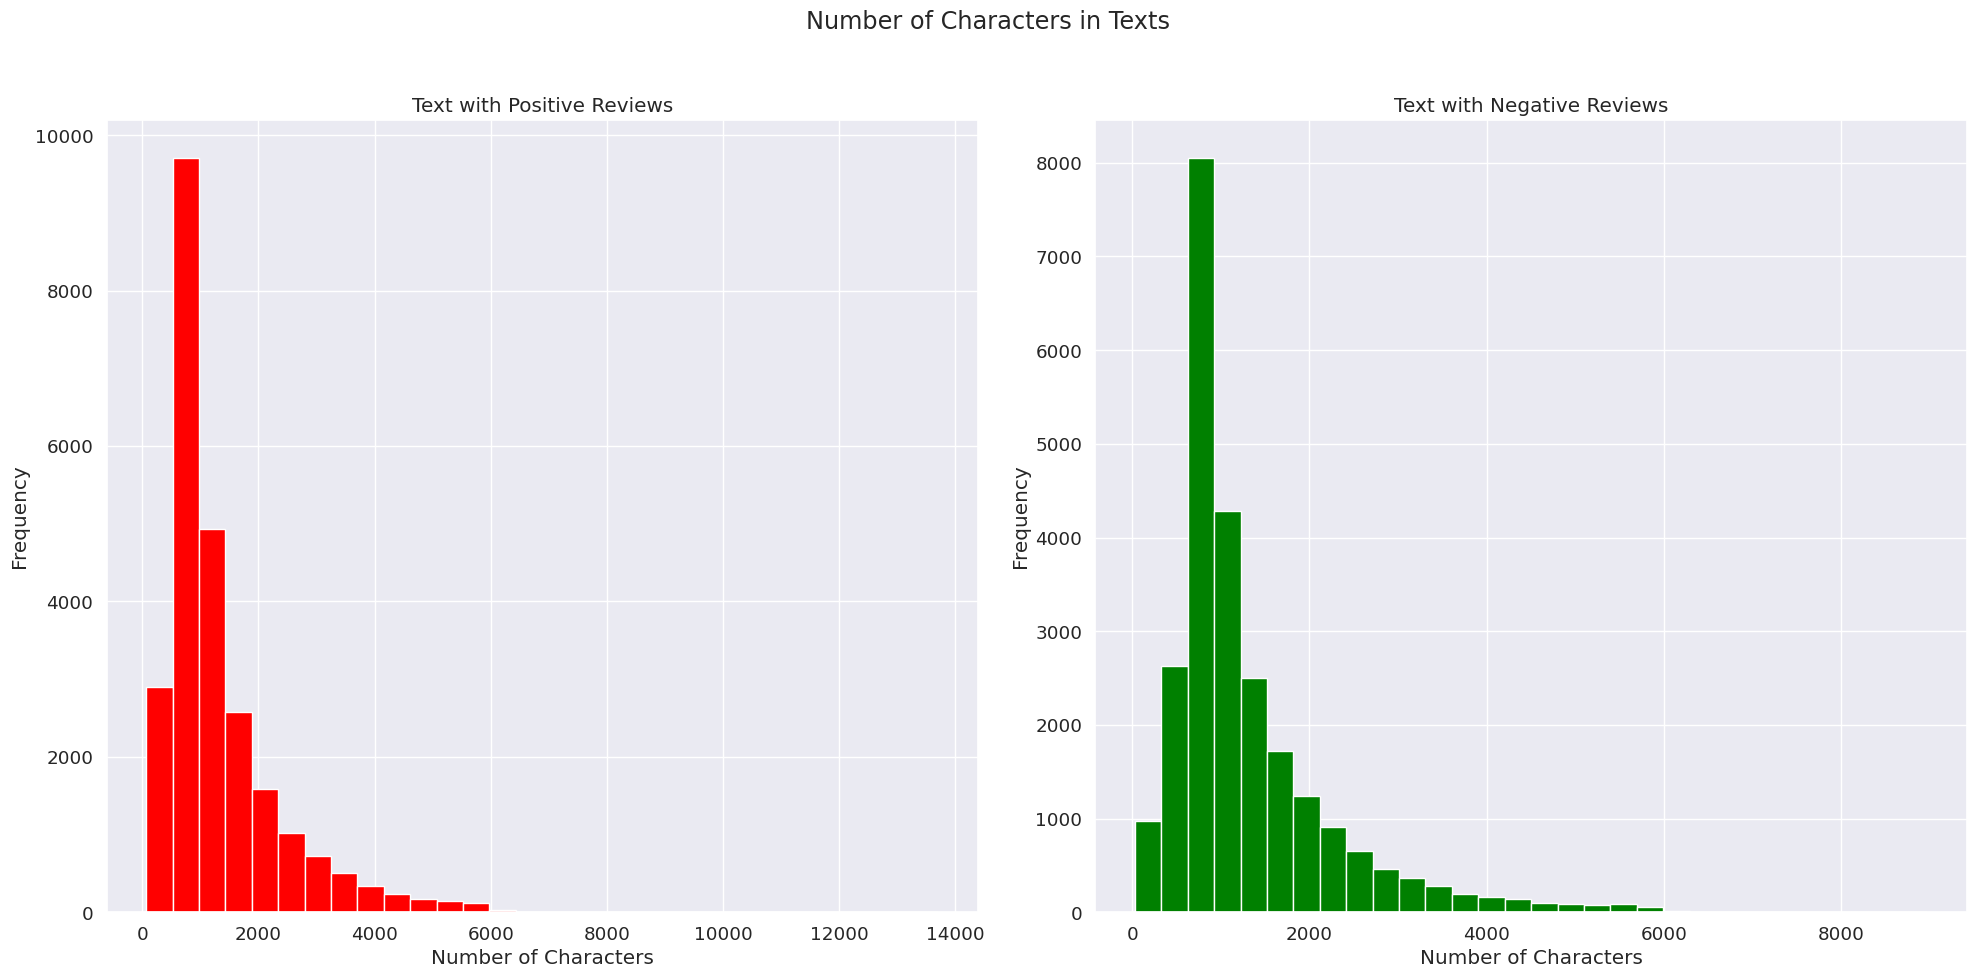

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# positive reviews
text_len_positive = df[df['sentiment'] == 'positive']['review'].str.len()
ax1.hist(text_len_positive, color='red', bins=30)
ax1.set_title('Text with Positive Reviews')
ax1.set_xlabel('Number of Characters')
ax1.set_ylabel('Frequency')

# negative reviews
text_len_negative = df[df['sentiment'] == 'negative']['review'].str.len()
ax2.hist(text_len_negative, color='green', bins=30)
ax2.set_title('Text with Negative Reviews')
ax2.set_xlabel('Number of Characters')
ax2.set_ylabel('Frequency')

fig.suptitle('Number of Characters in Texts')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

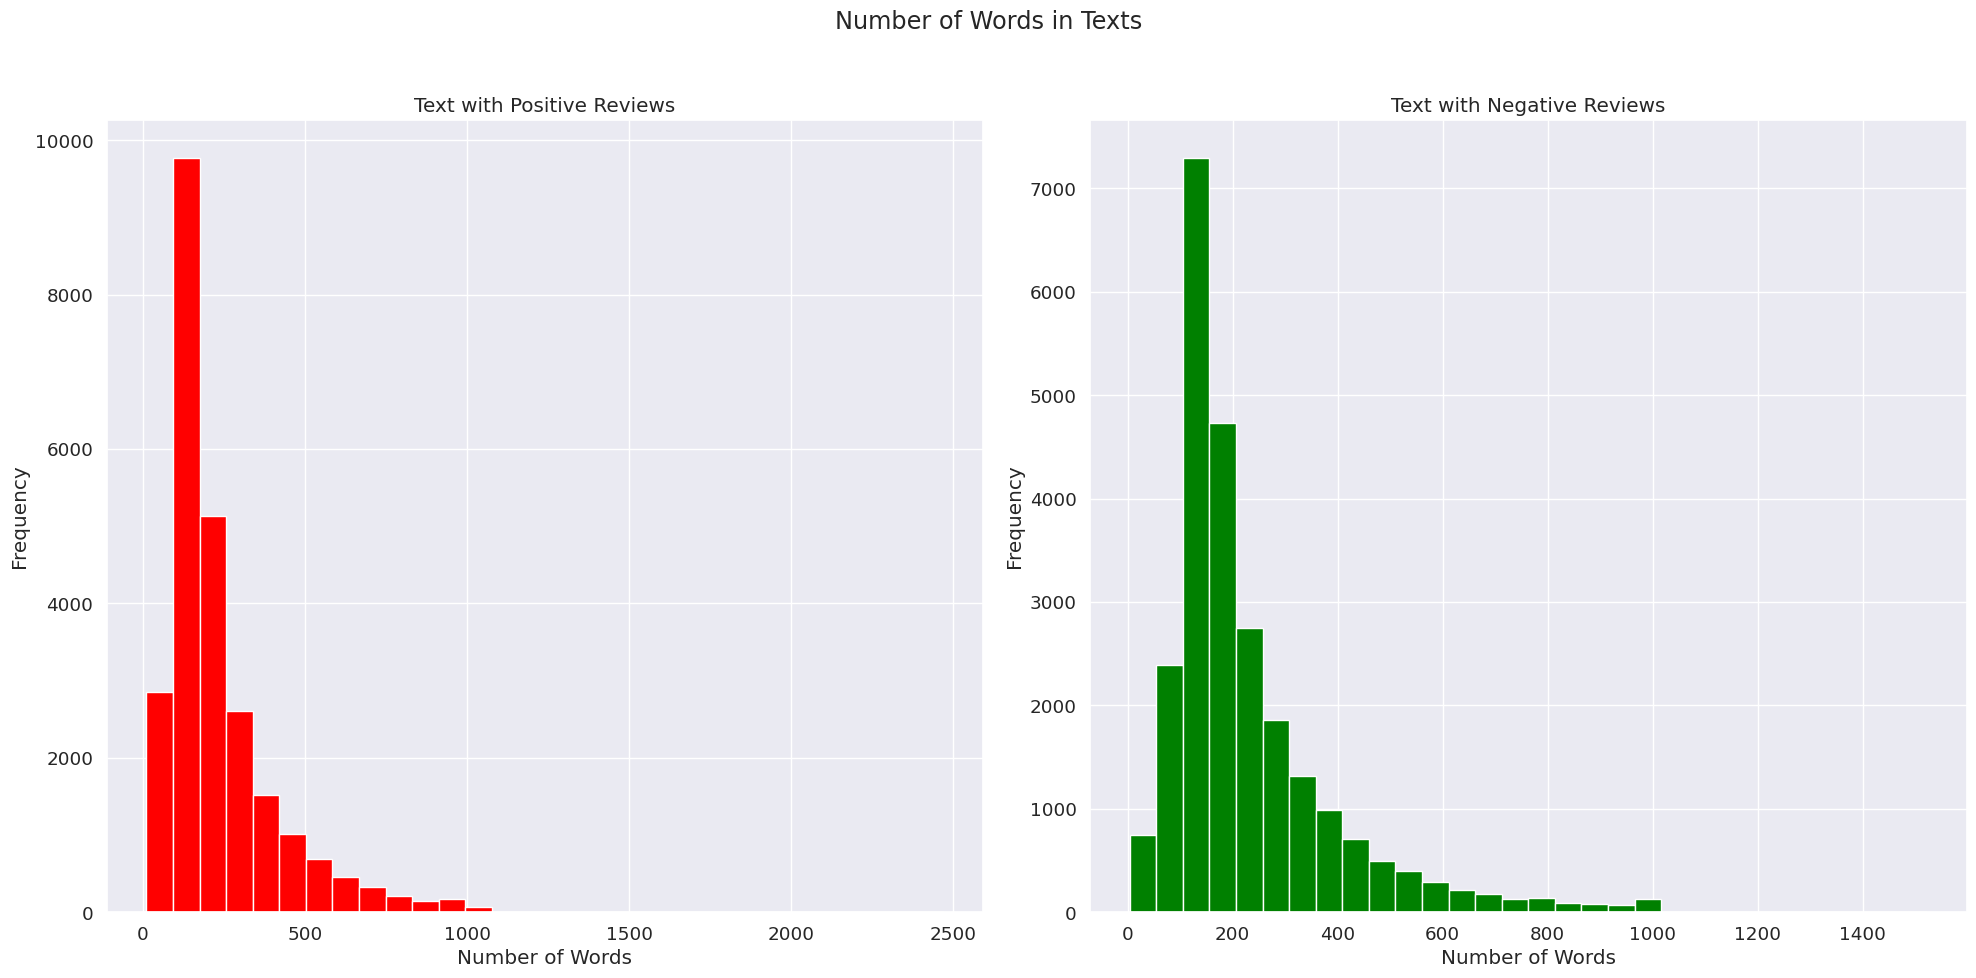

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# positive reviews: counting words by splitting on spaces
text_len_positive = df[df['sentiment'] == 'positive']['review'].str.split().map(lambda x: len(x))
ax1.hist(text_len_positive, color='red', bins=30)
ax1.set_title('Text with Positive Reviews')
ax1.set_xlabel('Number of Words')
ax1.set_ylabel('Frequency')

# negative reviews: counting words by splitting on spaces
text_len_negative = df[df['sentiment'] == 'negative']['review'].str.split().map(lambda x: len(x))
ax2.hist(text_len_negative, color='green', bins=30)
ax2.set_title('Text with Negative Reviews')
ax2.set_xlabel('Number of Words')
ax2.set_ylabel('Frequency')

fig.suptitle('Number of Words in Texts')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

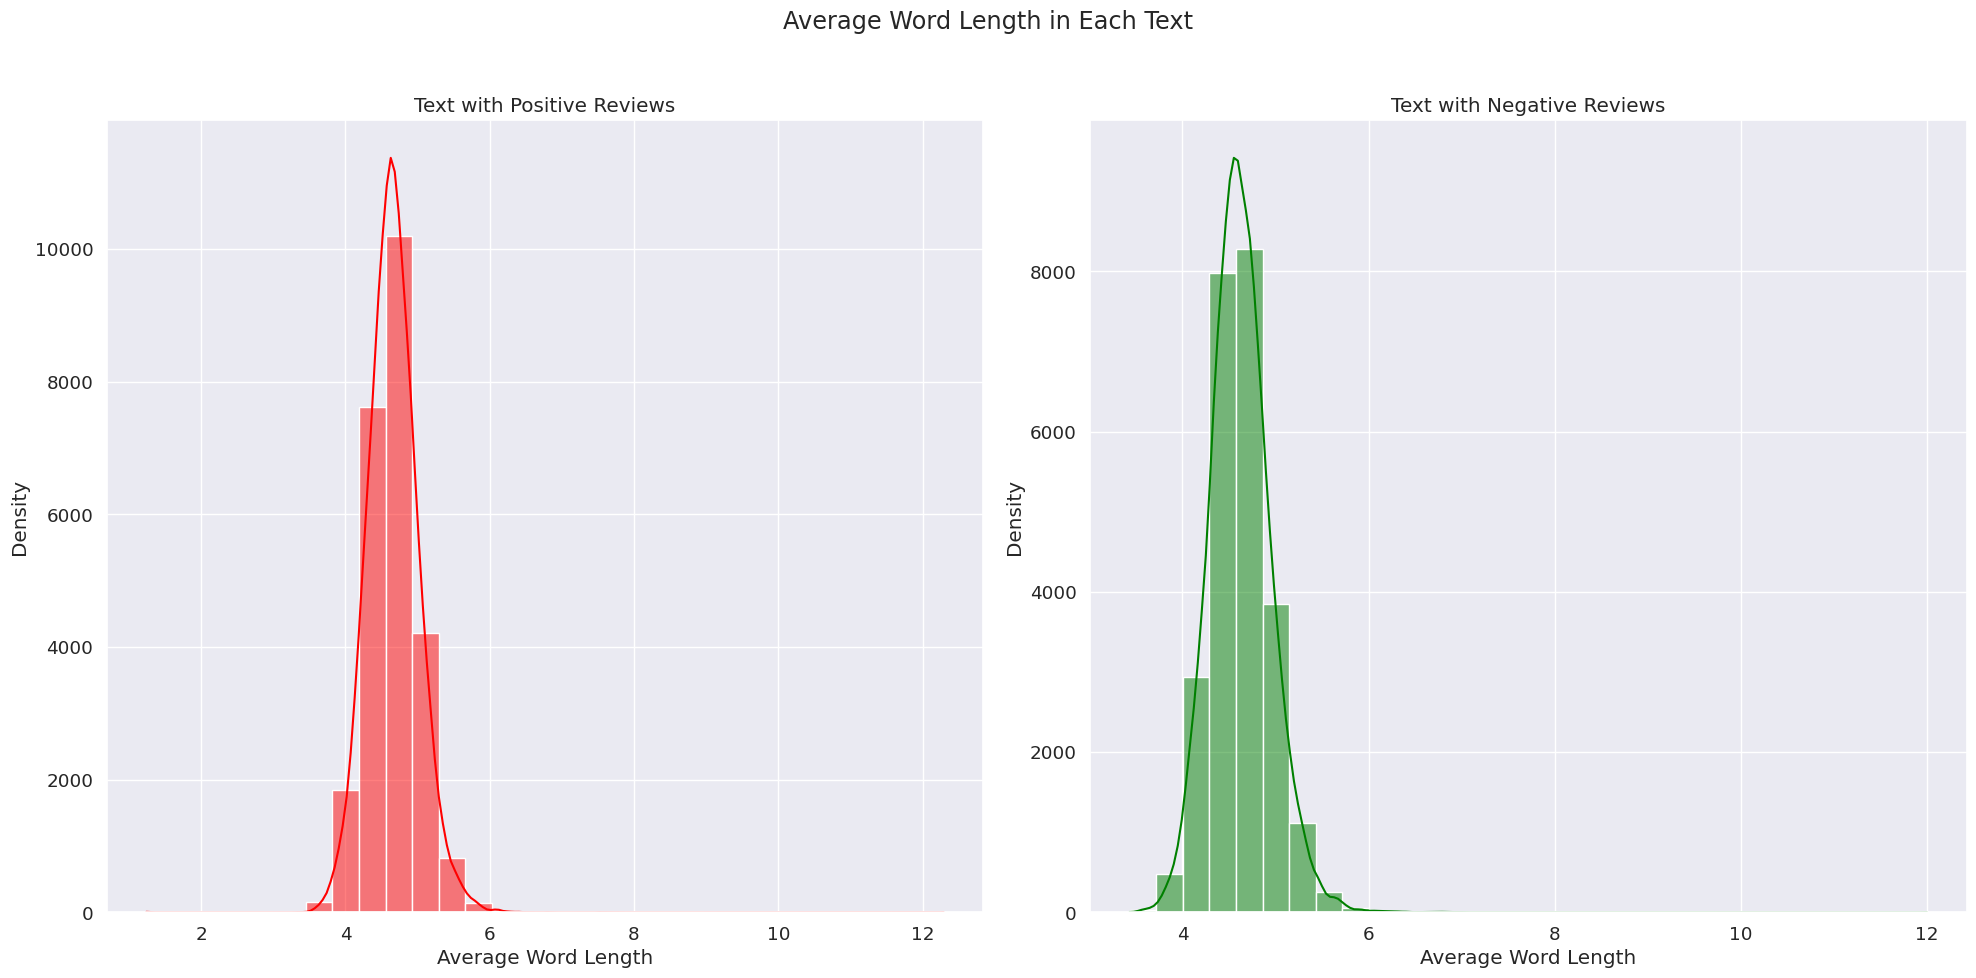

In [ ]:
import numpy as np

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# positive reviews: split text into words, calculate word lengths, and mean word length
word_positive = df[df['sentiment'] == 'positive']['review'].str.split().apply(lambda x: [len(i) for i in x])
sns.histplot(word_positive.map(lambda x: np.mean(x)), ax=ax1, color='red', kde=True, bins=30)
ax1.set_title('Text with Positive Reviews')
ax1.set_xlabel('Average Word Length')
ax1.set_ylabel('Density')

# negative reviews: split text into words, calculate word lengths, and mean word length
word_negative = df[df['sentiment'] == 'negative']['review'].str.split().apply(lambda x: [len(i) for i in x])
sns.histplot(word_negative.map(lambda x: np.mean(x)), ax=ax2, color='green', kde=True, bins=30)
ax2.set_title('Text with Negative Reviews')
ax2.set_xlabel('Average Word Length')
ax2.set_ylabel('Density')
fig.suptitle('Average Word Length in Each Text')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## 2.3 N-gram Analysis of Text Reviews

### 2.3.1 Unigram Analysis


In [ ]:
import pandas as pd
import plotly.express as px
from sklearn.feature_extraction.text import CountVectorizer

# top n-grams
def get_top_text_ngrams(text_series, n=20, ngram=1):
    vectorizer = CountVectorizer(ngram_range=(ngram, ngram), stop_words='english')
    ngrams = vectorizer.fit_transform(text_series)
    sum_words = ngrams.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

file_path = '/content/drive/MyDrive/INFO555/Project1/cleaned_reviews.csv'
df = pd.read_csv(file_path)

# top unigrams
most_common_uni = get_top_text_ngrams(df.cleaned_review, 20, 1)
most_common_uni = dict(most_common_uni)

# common words and their counts using dataframe
temp = pd.DataFrame(columns=["Common_words", "Count"])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())

fig = px.bar(temp, x="Count", y="Common_words", title='Common Words in Text (Unigram Analysis)', orientation='h',
             width=700, height=700, color='Common_words')

fig.show()


### 2.3.2 Bigram Analysis


In [ ]:
# top bigrams
most_common_bi = get_top_text_ngrams(df.cleaned_review, 20, 2)  # n=2 for bigrams
most_common_bi = dict(most_common_bi)

# store common biagrams and their counts using dataframe
temp_bi = pd.DataFrame(columns=["Common_bigrams", "Count"])
temp_bi["Common_bigrams"] = list(most_common_bi.keys())
temp_bi["Count"] = list(most_common_bi.values())

fig_bi = px.bar(temp_bi, x="Count", y="Common_bigrams", title='Common Bigrams in Text', orientation='h',
                 width=700, height=700, color='Common_bigrams')

fig_bi.show()


### 2.3.3 Trigram Analysis

In [ ]:
# top trigrams
most_common_tri = get_top_text_ngrams(df.cleaned_review, 20, 3)  # n=3 for trigrams
most_common_tri = dict(most_common_tri)

# store common trigrams and their counts using dataframe
temp_tri = pd.DataFrame(columns=["Common_words", "Count"])
temp_tri["Common_words"] = list(most_common_tri.keys())
temp_tri["Count"] = list(most_common_tri.values())

fig_tri = px.bar(temp_tri, x="Count", y="Common_words", title='Common Words in Text (Trigram Analysis)', orientation='h',
                 width=700, height=700, color='Common_words')

fig_tri.show()


# 3 Logistic Regression

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

X = df.cleaned_review
y = df.sentiment

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# convert text data into TF-IDF features
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# model building
log_reg = LogisticRegression(max_iter=200)  # Increased max_iter to 200

# hyperparameter grid for tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear']
}

# GridSearchCV with logistic regression and the parameter grid
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')

# fit the model on the training data
grid_search.fit(X_train_tfidf, y_train)

# best estimator from grid search
best_log_reg = grid_search.best_estimator_

# predictions on the test set using the best estimator
y_pred = best_log_reg.predict(X_test_tfidf)

# evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred))

# best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

Accuracy: 0.8813
              precision    recall  f1-score   support

    negative       0.89      0.87      0.88      4961
    positive       0.87      0.89      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

Best Hyperparameters: {'C': 10, 'solver': 'liblinear'}


##3.1 Hyperparameter Tuning Analysis

In [4]:
# grid search results
results = grid_search.cv_results_

# dataFrame for better visualization
results_df = pd.DataFrame(results)

# extract the best parameters and their scores
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# results
print("Best Hyperparameters:", best_params)
print("Best Cross-Validation Score:", best_score)

# display the full results for more context
results_df[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']]

Best Hyperparameters: {'C': 10, 'solver': 'liblinear'}
Best Cross-Validation Score: 0.87795


,params,mean_test_score,std_test_score,rank_test_score
0,"{'C': 0.01, 'solver': 'lbfgs'}",0.793275,0.006033,10
1,"{'C': 0.01, 'solver': 'liblinear'}",0.793875,0.006200,9
2,"{'C': 0.1, 'solver': 'lbfgs'}",0.845725,0.004474,7
3,"{'C': 0.1, 'solver': 'liblinear'}",0.845075,0.004922,8
4,"{'C': 1, 'solver': 'lbfgs'}",0.874875,0.002031,3
5,"{'C': 1, 'solver': 'liblinear'}",0.874650,0.001990,4
6,"{'C': 10, 'solver': 'lbfgs'}",0.876475,0.001372,2
7,"{'C': 10, 'solver': 'liblinear'}",0.877950,0.001676,1
8,"{'C': 100, 'solver': 'lbfgs'}",0.867175,0.003042,6
9,"{'C': 100, 'solver': 'liblinear'}",0.867900,0.003116,5


##3.2 Error Analysis

In [5]:
from sklearn.metrics import confusion_matrix, classification_report

# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

# error rates
total_samples = len(y_test)
overall_error_rate = 1 - accuracy
error_rate_negative = conf_matrix[0][1] / (conf_matrix[0][0] + conf_matrix[0][1])  # False negatives / Total actual negatives
error_rate_positive = conf_matrix[1][0] / (conf_matrix[1][0] + conf_matrix[1][1])  # False positives / Total actual positives

print(f'Overall Error Rate: {overall_error_rate:.4f}')
print(f'Error Rate for Negative Sentiment: {error_rate_negative:.4f}')
print(f'Error Rate for Positive Sentiment: {error_rate_positive:.4f}')

# classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# misclassified samples
misclassified_indices = (y_test != y_pred).index
misclassified_samples = df.iloc[misclassified_indices][['sentiment', 'cleaned_review']]
print("\nMisclassified Samples:")
print(misclassified_samples)


Confusion Matrix:
[[4312  649]
 [ 538 4501]]
Overall Error Rate: 0.1187
Error Rate for Negative Sentiment: 0.1308
Error Rate for Positive Sentiment: 0.1068

Classification Report:
              precision    recall  f1-score   support

    negative       0.89      0.87      0.88      4961
    positive       0.87      0.89      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000


Misclassified Samples:
      sentiment                                     cleaned_review
33553  positive  I really liked Summerslam due look curtains ju...
9427   positive  Not many television shows appeal quite as many...
199    negative  film quickly gets major chase scene with ever ...
12447  positive  Jane Austen would definitely approve Paltrow d...
39489  negative  Expectations were somewhat high me when I went...
...         ...                                                ...


##3.2 Visualizations for Analysis

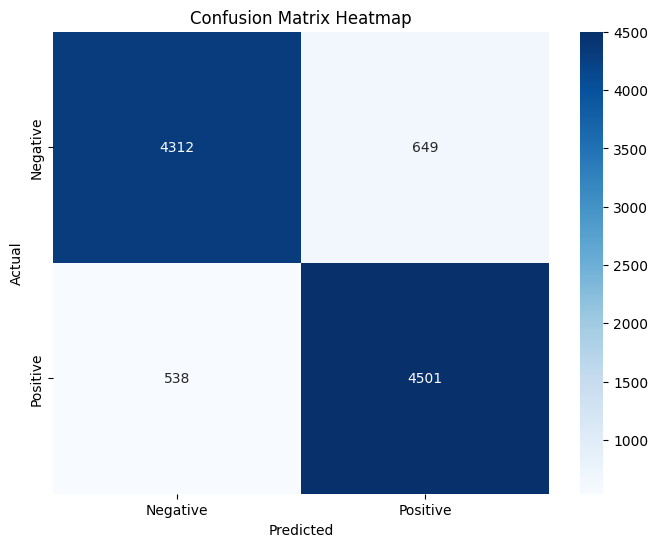

<Figure size 1000x600 with 0 Axes>

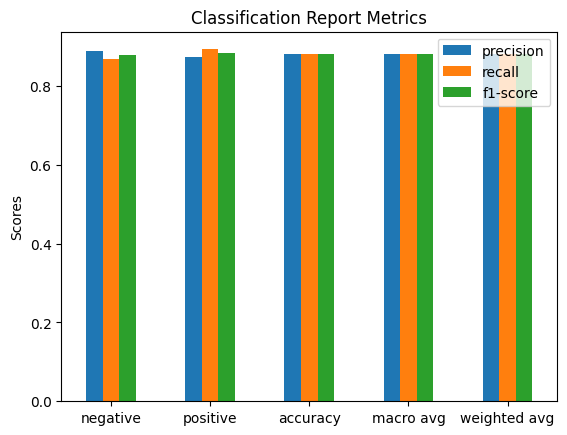

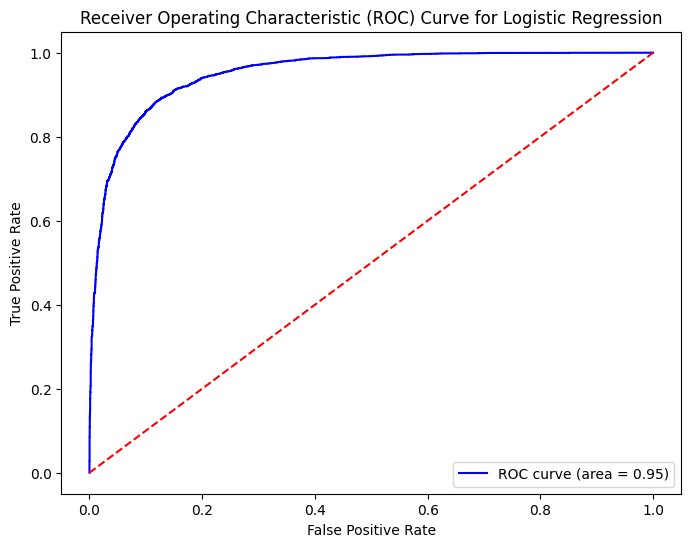

<ipython-input-6-5d601b0d1a85>:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='misclassified', data=misclassified_df, palette='pastel')


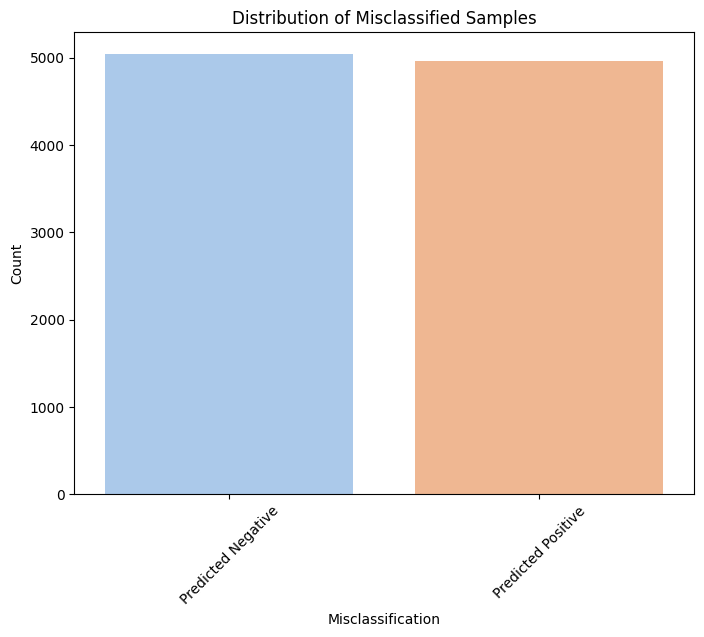

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
# heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Heatmap')
plt.show()



from sklearn.metrics import classification_report
import pandas as pd
# classification report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
# plot precision, recall, and F1-score
plt.figure(figsize=(10, 6))
report_df[['precision', 'recall', 'f1-score']].plot(kind='bar')
plt.title('Classification Report Metrics')
plt.ylabel('Scores')
plt.xticks(rotation=0)
plt.show()



from sklearn.metrics import roc_curve, auc
# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test.map({'negative': 0, 'positive': 1}), best_log_reg.predict_proba(X_test_tfidf)[:, 1])
roc_auc = auc(fpr, tpr)
# plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()



import numpy as np
# misclassified samples
misclassified_df = df.iloc[misclassified_indices][['sentiment', 'cleaned_review']]
misclassified_df['misclassified'] = np.where(misclassified_df['sentiment'] == 'positive', 'Predicted Negative', 'Predicted Positive')
# distribution of misclassifications with pastel palette
plt.figure(figsize=(8, 6))
sns.countplot(x='misclassified', data=misclassified_df, palette='pastel')
plt.title('Distribution of Misclassified Samples')
plt.xlabel('Misclassification')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()






```
# This is formatted as code
```

# 4 Support Vector Machine

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import nltk
nltk.download('stopwords')

df = pd.read_csv('/content/drive/MyDrive/INFO555/Project1/cleaned_reviews.csv')


df = df.head(10000)

# stop words
stop_words = set(stopwords.words('english'))


# preprocessing
def preprocess_text(text):
    # Tokenize
    tokens = word_tokenize(text.lower())
    # Remove punctuation and stop words
    tokens = [word for word in tokens if word not in string.punctuation and word not in stop_words]
    return ' '.join(tokens)


print(df[['cleaned_review', 'sentiment']].head())

from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# fit and transform the cleaned reviews to obtain the TF-IDF features
tfidf_features = tfidf_vectorizer.fit_transform(df['cleaned_review'])

# convert the result to a DataFrame for easier handling (optional)
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# shape of the TF-IDF matrix
print("TF-IDF feature matrix shape:", tfidf_df.shape)

# features and labels
X = tfidf_features
y = df['sentiment']

# training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train the SVM classifier
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# predictions on the test set
y_pred = svm_model.predict(X_test)

# evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                      cleaned_review sentiment
0  One other reviewers has mentioned after watchi...  positive
1  wonderful little filming technique very very f...  positive
2  I thought was wonderful way spend time too hot...  positive
3  Basically family where little boy thinks zombi...  negative
4  Petter Time visually stunning film Mattei offe...  positive
TF-IDF feature matrix shape: (10000, 43764)
Accuracy: 0.8555
Classification Report:
               precision    recall  f1-score   support

    negative       0.87      0.83      0.85       996
    positive       0.84      0.88      0.86      1004

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.86      0.86      0.86      2000



##4.1 Error Analysis


In [ ]:
from sklearn.metrics import confusion_matrix

# predictions on the test set
y_pred = svm_model.predict(X_test)

# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)

# calculate error rates
total_samples = len(y_test)
misclassified_samples = (y_test != y_pred).sum()
error_rate = misclassified_samples / total_samples

# error rates
print(f"Total Samples: {total_samples}")
print(f"Misclassified Samples: {misclassified_samples}")
print(f"Error Rate: {error_rate:.4f}")

# classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# misclassified samples
misclassified_indices = (y_test != y_pred).index
misclassified_samples = df.iloc[misclassified_indices][['sentiment', 'cleaned_review']]

print("\nMisclassified Samples:")
print(misclassified_samples)



Confusion Matrix:
 [[827 169]
 [120 884]]
Total Samples: 2000
Misclassified Samples: 289
Error Rate: 0.1445
Classification Report:
               precision    recall  f1-score   support

    negative       0.87      0.83      0.85       996
    positive       0.84      0.88      0.86      1004

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.86      0.86      0.86      2000


Misclassified Samples:
     sentiment                                     cleaned_review
6252  negative  pretty pointless Starting with opening title s...
4684  negative  I agree with comments regarding downward last ...
1731  negative  I picked up movie with intention getting bad z...
4742  positive  I thought movie was LOL not be taken movie abo...
4521  positive  was an interesting study societal as well as I...
...        ...                                                ...
6412  positive  Wizards Lost Kingdom movie about young 

##4.2 Visualization for Analysis

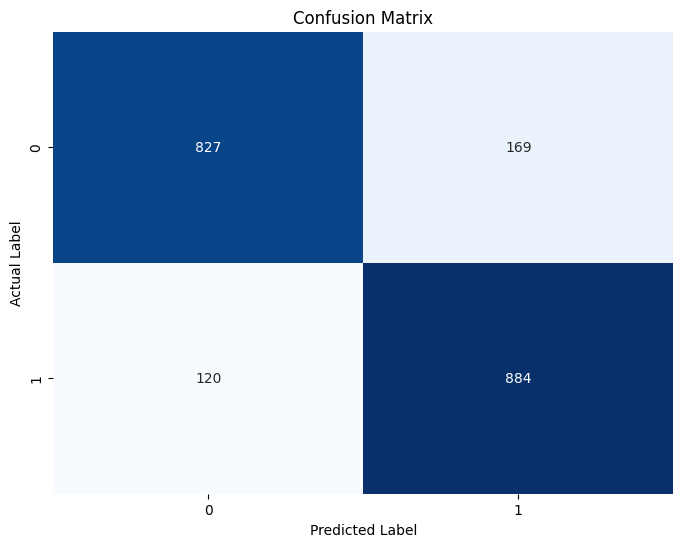

<Figure size 1000x600 with 0 Axes>

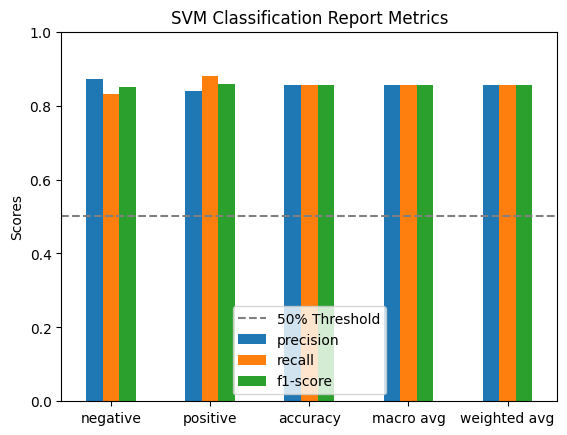

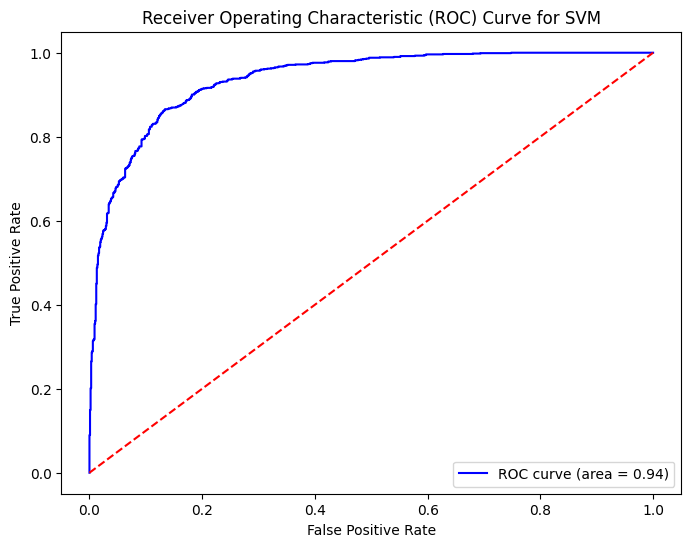

<ipython-input-13-6bc821c427bf>:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='misclassified', data=misclassified_df, palette='pastel')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


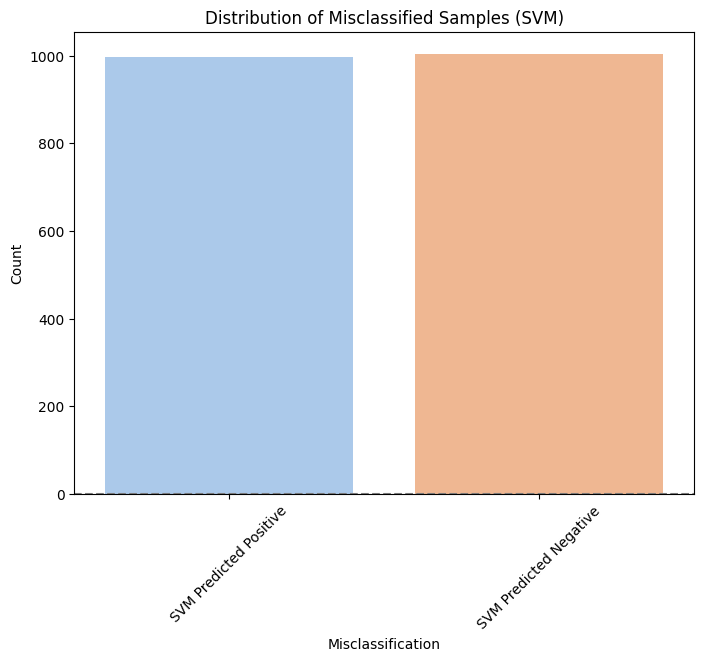

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()





from sklearn.metrics import classification_report
import pandas as pd
# classification report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
# plot precision, recall, and F1-score for each class
plt.figure(figsize=(10, 6))
report_df[['precision', 'recall', 'f1-score']].plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c'])  # Use specific colors for consistency
plt.title('SVM Classification Report Metrics')
plt.ylabel('Scores')
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.axhline(0.5, color='gray', linestyle='--', label='50% Threshold')
plt.legend()
plt.show()



from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# create and train the SVM classifier with probability estimation
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)
# predicted probabilities for the positive class
y_prob = svm_model.predict_proba(X_test)[:, 1]
# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test.map({'negative': 0, 'positive': 1}), y_prob)
roc_auc = auc(fpr, tpr)
# plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for SVM')
plt.legend(loc='lower right')
plt.show()




import numpy as np
import seaborn as sns
# dataFrame for misclassified samples
misclassified_df = df.iloc[misclassified_indices][['sentiment', 'cleaned_review']]
misclassified_df['misclassified'] = np.where(misclassified_df['sentiment'] == 'positive', 'SVM Predicted Negative', 'SVM Predicted Positive')
plt.figure(figsize=(8, 6))
sns.countplot(x='misclassified', data=misclassified_df, palette='pastel')
plt.title('Distribution of Misclassified Samples (SVM)')
plt.xlabel('Misclassification')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.axhline(y=0, color='gray', linestyle='--')
plt.show()


# 5 DistilBERT

In [ ]:
import pandas as pd
import re
from bs4 import BeautifulSoup, MarkupResemblesLocatorWarning
import warnings
from sklearn.metrics import accuracy_score

from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
import torch

#  tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)  # Change num_labels as needed

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
import torch

file_path = r'/content/drive/MyDrive/INFO555/Project1/cleaned_reviews.csv'
df = pd.read_csv(file_path)

# select only first 2000 rows for faster computing
df = pd.read_csv(file_path).head(2000)


# split the dataset
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['sentiment'])

# tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)

# tokenize the cleaned reviews
train_encodings = tokenizer(train_df['cleaned_review'].tolist(), truncation=True, padding=True)
test_encodings = tokenizer(test_df['cleaned_review'].tolist(), truncation=True, padding=True)

# dataset class
class SentimentDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = SentimentDataset(train_encodings, train_df['sentiment'].map({'positive': 1, 'negative': 0}).tolist())
test_dataset = SentimentDataset(test_encodings, test_df['sentiment'].map({'positive': 1, 'negative': 0}).tolist())

# training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
)

# trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

# train the model
trainer.train()

# evaluate
predictions = trainer.predict(test_dataset)
preds = torch.argmax(torch.tensor(predictions.predictions), axis=1)

# accuracy
accuracy = accuracy_score(test_df['sentiment'].map({'positive': 1, 'negative': 0}).tolist(), preds)
print("Accuracy:", accuracy)

# classification report
print(classification_report(test_df['sentiment'].map({'positive': 1, 'negative': 0}).tolist(), preds, target_names=['negative', 'positive']))



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should prob

Step,Training Loss
500,0.460700


Accuracy: 0.855
              precision    recall  f1-score   support

    negative       0.90      0.80      0.85       199
    positive       0.82      0.91      0.86       201

    accuracy                           0.85       400
   macro avg       0.86      0.85      0.85       400
weighted avg       0.86      0.85      0.85       400



##5.1 Error Analysis

In [ ]:
from sklearn.metrics import confusion_matrix

y_true = test_df['sentiment'].map({'positive': 1, 'negative': 0}).tolist()
y_pred = preds.numpy()  # Convert predictions to numpy array

# confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# error rates
total_samples = len(y_true)
misclassified_samples = (y_true != y_pred).sum()
error_rate = misclassified_samples / total_samples

print(f"Total Samples: {total_samples}")
print(f"Misclassified Samples: {misclassified_samples}")
print(f"Error Rate: {error_rate:.4f}")

# classification report
print("Classification Report:\n", classification_report(y_true, y_pred, target_names=['negative', 'positive']))

# misclassified samples
misclassified_indices = [i for i in range(total_samples) if y_true[i] != y_pred[i]]  # Indices of misclassified samples
misclassified_samples = test_df.iloc[misclassified_indices][['sentiment', 'cleaned_review']]  # Extracting the corresponding rows

print("\nMisclassified Samples:")
print(misclassified_samples)  # This will display the misclassified samples


Confusion Matrix:
 [[167  32]
 [ 24 177]]
Total Samples: 400
Misclassified Samples: 56
Error Rate: 0.1400
Classification Report:
               precision    recall  f1-score   support

    negative       0.87      0.84      0.86       199
    positive       0.85      0.88      0.86       201

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400


Misclassified Samples:
     sentiment                                     cleaned_review
1721  positive  I must say I really had no idea I was going si...
25    positive  Karen Carpenter Story shows little more about ...
1253  positive  Darling Lili mixture Perfection Julie Andrews ...
1825  positive  boring or Worth your If you can spare Better t...
66    negative  Busty beauty Stacie Randall plays PVC bitch fa...
1381  negative  How viewers react new Shirley which was promot...
18    positive  I remember was first film i had watched a

##5.2 Visualization for Analysis

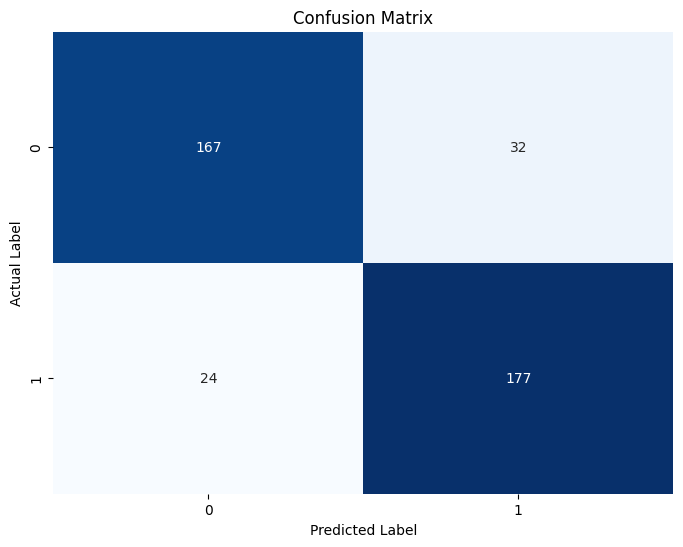

<Figure size 1000x600 with 0 Axes>

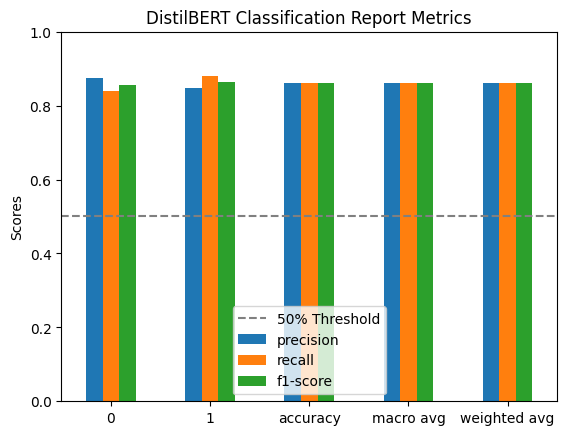

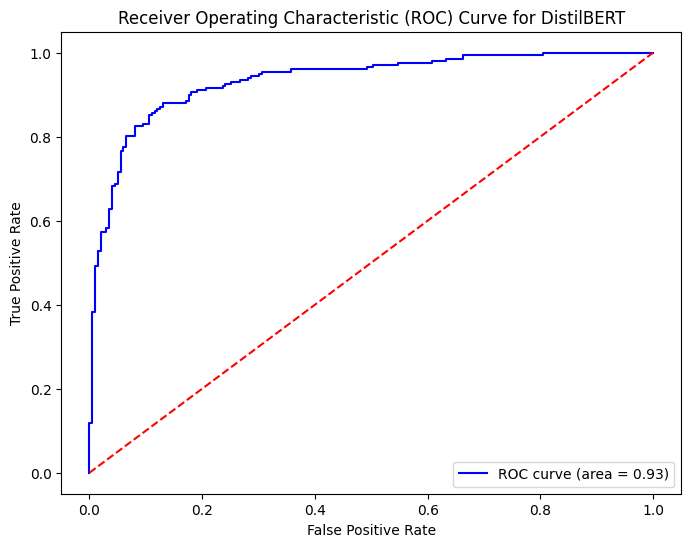

<ipython-input-8-f6fc0ed46a0e>:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='misclassified', data=misclassified_df, palette='pastel')


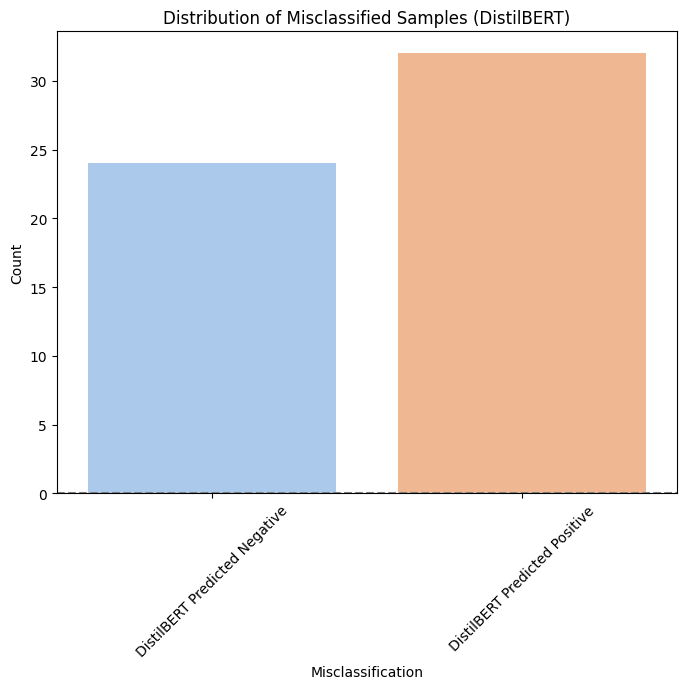

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# confusion matrix
conf_matrix = confusion_matrix(y_true, preds.numpy())
# confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()



from sklearn.metrics import classification_report
import pandas as pd
# classification report
report = classification_report(y_true, preds.numpy(), output_dict=True)
report_df = pd.DataFrame(report).transpose()
# precision, recall, and F1-score for each class
plt.figure(figsize=(10, 6))
report_df[['precision', 'recall', 'f1-score']].plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('DistilBERT Classification Report Metrics')
plt.ylabel('Scores')
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.axhline(0.5, color='gray', linestyle='--', label='50% Threshold')
plt.legend()
plt.show()





from sklearn.metrics import roc_curve, auc
# assuming model outputs probabilities
y_prob = trainer.predict(test_dataset).predictions[:, 1]  # Adjust indexing if needed
fpr, tpr, thresholds = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)
# ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for DistilBERT')
plt.legend(loc='lower right')
plt.show()



import numpy as np
# misclassified samples
misclassified_indices = [i for i in range(len(y_true)) if y_true[i] != preds.numpy()[i]]
misclassified_df = test_df.iloc[misclassified_indices][['sentiment', 'cleaned_review']]
misclassified_df['misclassified'] = np.where(misclassified_df['sentiment'] == 'positive', 'DistilBERT Predicted Negative', 'DistilBERT Predicted Positive')
# distribution of misclassifications
plt.figure(figsize=(8, 6))
sns.countplot(x='misclassified', data=misclassified_df, palette='pastel')
plt.title('Distribution of Misclassified Samples (DistilBERT)')
plt.xlabel('Misclassification')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.axhline(y=0, color='gray', linestyle='--')
plt.show()
